model 





In [10]:
import keras
#from cnnmodel import model
from keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import os, random, cv2
from keras.utils import to_categorical

ImportError: cannot import name 'normalize_data_format'

In [3]:
def createFileList(myDir):
    format = ('.tiff','.jpg','.png','.PNG')
    fileList = []
    print(os.walk(myDir, topdown=False))
    for root, dirs, files in os.walk(myDir, topdown=False):
        
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList 

In [4]:
classes={0:'angry', 1:'fear', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}




batch_size = 32
epochs = 60

train_x = [] #(10000,1,227,227) (1,227,227)에 대해 append
train_y = [] #(10000, 6) 


#train_dir에 적용
#e.g. case sad
#path 읽어 = [(1,227,227)만들기 |  파싱하여 label 얻기] 

#train_x.append(q)
'''
z = load_img(path = './data/train/sad/KA.SA2.34.tiff', grayscale=True, target_size=(227,227),
    interpolation='nearest')
q=np.asarray(z).astype('float32')
print(np.asarray([q]).shape)
q = np.asarray([q])
'''

fileList = []
fileList = createFileList('./data/train')

<generator object walk at 0x7fe415d600f8>


In [6]:
len(fileList)

1992

In [7]:
for x in fileList:
    z = load_img(path =x, grayscale=True, target_size=(227,227),
    interpolation='nearest')
    q=np.asarray(z).astype('float32')
    q = np.asarray([q])
    train_x.append(q)
    
    t = -1
    for y in classes.items():
        if y[1] in x:
            print(y[0])
            t = y[0]
        
    train_y.append(to_categorical(t, 6))

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
print(train_x.shape)   
print(train_y.shape)   

train_len = train_x.shape[0]

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [8]:
#이상  train_x/ train_y 구성 끝

#val_x/ val_y 도 일단 똑같이 구성

val_x = []
val_y = []


fileList = createFileList('./data/test')



for x in fileList:
    z = load_img(path =x, grayscale=True, target_size=(227,227),
    interpolation='nearest')
    q=np.asarray(z).astype('float32')
    q = np.asarray([q])
    val_x.append(q)
    
    t = -1
    for y in classes.items():
        if y[1] in x:
            t = y[0]
        
    val_y.append(to_categorical(t, 6))

val_x = np.asarray(val_x)
val_y = np.asarray(val_y)
print(val_x.shape)   
print(val_y.shape)   

val_len = train_x.shape[0]


<generator object walk at 0x7fe411ce2888>
(0,)
(0,)


In [10]:

"""
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rescale=1./255,
    rotation_range=10,
    shear_range=0.1,
    fill_mode = 'constant',
    cval = 0,
    horizontal_flip=True)

print(train_x.shape)
train_x_moveaxis = np.moveaxis(train_x, 1, 3)  
print(train_x_moveaxis.shape)
train_datagen.fit(train_x_moveaxis)

train_x_mean = train_datagen.mean"""


(1793, 1, 227, 227)
(1793, 227, 227, 1)


In [92]:
train_datagen = ImageDataGenerator(
    #samplewise_center=True,
    #samplewise_std_normalization=True,
    #featurewise_std_normalization=True,
    #rescale=1./255,
    #rotation_range=10,
    #shear_range=0.1,
    #fill_mode = 'constant',
    #cval = 0,
    #horizontal_flip=True)
    )

print(train_x.shape)
train_x_moveaxis = np.moveaxis(train_x, 1, 3)
print(train_x_moveaxis.shape)
train_datagen.fit(train_x_moveaxis)



(1992, 1, 227, 227)
(1992, 227, 227, 1)


In [93]:
temp = train_datagen.flow(train_x_moveaxis, train_y, batch_size =1)

In [94]:
a =temp.next()

In [95]:

print(np.average(a[0][0][0]))

158.51541


In [55]:
np.max(a[0][0][0])

0.8016835

In [11]:
print(val_x.shape)

(199, 1, 227, 227)


In [12]:
val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rescale=1./255, 
)
val_x_moveaxis = np.moveaxis(val_x, 1, 3)  
val_datagen. fit(val_x_moveaxis)
#val_datagen.mean = x꺼 배끼끼
print(val_datagen.mean)
val_datagen.mean = train_x_mean
print(val_datagen.mean)

[[[121.65533]]]
[[[118.49298]]]


In [13]:
#sequential model definition
#model.compile
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adadelta
from keras.layers.normalization import BatchNormalization


def model_generate():
    img_rows, img_cols = 227, 227
    model = Sequential()
    model.add(Convolution2D(36, 11, 11, border_mode='valid',
                            input_shape=(img_rows, img_cols,1)))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(2, 2), dim_ordering='tf'))
    model.add(MaxPooling2D(pool_size=(5, 5),strides=(2, 2)))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='tf')) 
    
    model.add(Convolution2D(96, 5, 5))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='tf')) 
    
    model.add(Convolution2D(144, 3, 3))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(keras.layers.convolutional.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))
     
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='tf'))
    model.add(Convolution2D(96, 3, 3))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='tf'))
    model.add(Convolution2D(128, 3, 3))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
     
    model.add(keras.layers.convolutional.ZeroPadding2D(padding=(1, 1), dim_ordering='tf'))
    model.add(keras.layers.convolutional.AveragePooling2D(pool_size=(3, 3),strides=(2, 2)))
     
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(Dropout(0.2))
    
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(keras.layers.advanced_activations.PReLU(init='zero', weights=None))
    model.add(Dropout(0.2))
     
      
    model.add(Dense(6))
    model.add(BatchNormalization())
      
    model.add(Activation('softmax'))

    ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
    #model = multi_gpu_model(model, gpus=2)
    model.compile(loss='categorical_crossentropy',
                  optimizer=ada,
                  metrics=['accuracy'])
    model.summary()
    return model

model = model_generate()


filepath='model7_total_#4set_kwang3.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='auto')



/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (11, 11), input_shape=(227, 227,..., padding="valid")`
  
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  app.launch_new_instance()
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(2, 2), data_format="channels_last")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(1, 1), data_format="channels_last")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (5, 5))`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 217, 217, 36)      4392      
_________________________________________________________________
batch_normalization_1 (Batch (None, 217, 217, 36)      144       
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 217, 217, 36)      1695204   
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 221, 221, 36)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 109, 36)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 111, 111, 36)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 96)      86496     
__________

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D(padding=(1, 1), data_format="channels_last")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`


In [14]:
model.fit_generator(train_datagen.flow(train_x_moveaxis, train_y, batch_size =batch_size),
                    #steps_per_epoch = train_len/batch_size*12,
                    steps_per_epoch = train_len/batch_size*4,
                    epochs = epochs,
                    validation_data = val_datagen.flow(val_x_moveaxis,val_y,batch_size = batch_size),
                    callbacks = [checkpointer])

#l = train_datagen.flow(train_x_moveaxis, train_y, batch_size =batch_size)

#next(l)[0].shape

Epoch 1/60
225/224 [==============================] - 105s 466ms/step - loss: 0.9663 - acc: 0.7231 - val_loss: 0.7115 - val_acc: 0.8543

Epoch 00001: saving model to model7_total_#4set_kwang3.hdf5
Epoch 2/60
225/224 [==============================] - 67s 298ms/step - loss: 0.6991 - acc: 0.8754 - val_loss: 0.6883 - val_acc: 0.8543

Epoch 00002: saving model to model7_total_#4set_kwang3.hdf5
Epoch 3/60
225/224 [==============================] - 67s 298ms/step - loss: 0.6091 - acc: 0.9053 - val_loss: 0.6006 - val_acc: 0.8894

Epoch 00003: saving model to model7_total_#4set_kwang3.hdf5
Epoch 4/60
225/224 [==============================] - 67s 300ms/step - loss: 0.5424 - acc: 0.9414 - val_loss: 0.6087 - val_acc: 0.9146

Epoch 00004: saving model to model7_total_#4set_kwang3.hdf5
Epoch 5/60
225/224 [==============================] - 67s 298ms/step - loss: 0.5210 - acc: 0.9469 - val_loss: 0.5815 - val_acc: 0.8794

Epoch 00005: saving model to model7_total_#4set_kwang3.hdf5
Epoch 6/60
225/224 


Epoch 00042: saving model to model7_total_#4set_kwang3.hdf5
Epoch 43/60
225/224 [==============================] - 67s 299ms/step - loss: 0.1986 - acc: 0.9853 - val_loss: 0.3188 - val_acc: 0.9397

Epoch 00043: saving model to model7_total_#4set_kwang3.hdf5
Epoch 44/60
225/224 [==============================] - 67s 299ms/step - loss: 0.1957 - acc: 0.9859 - val_loss: 0.2999 - val_acc: 0.9598

Epoch 00044: saving model to model7_total_#4set_kwang3.hdf5
Epoch 45/60
225/224 [==============================] - 67s 299ms/step - loss: 0.1909 - acc: 0.9903 - val_loss: 0.2913 - val_acc: 0.9497

Epoch 00045: saving model to model7_total_#4set_kwang3.hdf5
Epoch 46/60
225/224 [==============================] - 68s 300ms/step - loss: 0.1831 - acc: 0.9855 - val_loss: 0.3070 - val_acc: 0.9397

Epoch 00046: saving model to model7_total_#4set_kwang3.hdf5
Epoch 47/60
225/224 [==============================] - 67s 299ms/step - loss: 0.1855 - acc: 0.9903 - val_loss: 0.3038 - val_acc: 0.9497

Epoch 00047: s

In [193]:
#classes={0:'angry', 1:'fear', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}
#vd = val_datagen.flow(val_x_moveaxis,val_y,batch_size = 1)
#sample = vd.next()
#sample_x,sample_y = sample
#print(sam)



test_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rescale=1./255, 
)
#print("0hi")
#print(test_datagen.mean)
test_datagen.fit(val_x_moveaxis[:10])
#print(test_datagen.mean)
test_datagen.mean = val_datagen.mean
#print(test_datagen.mean)

e = model.predict_generator(test_datagen.flow(val_x_moveaxis[:20],val_y[:20],batch_size = 1,shuffle= False))
print(val_datagen.mean)
print([np.argmax(pre) for pre in e])
#print(val_x_moveaxis[0])
#print(val_y)
print(e)
print([np.argmax(x) for x in val_y[:100]])

0hi
None
[[[133.10373]]]
[[[118.49298]]]
[[[118.49298]]]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[[0.03414822 0.02394584 0.02124234 0.03620007 0.85748535 0.02697813]
 [0.01963061 0.02707721 0.02222262 0.02509649 0.8837923  0.02218078]
 [0.01395999 0.02003425 0.01167886 0.00765912 0.9354988  0.01116909]
 [0.02085851 0.02197255 0.01309842 0.01724818 0.90964806 0.01717425]
 [0.01799338 0.02430207 0.01872429 0.01240368 0.91325897 0.01331759]
 [0.17142628 0.2114571  0.05193331 0.06938573 0.45604447 0.03975314]
 [0.03053679 0.03835205 0.02996775 0.03480078 0.8233014  0.04304129]
 [0.01308162 0.01388835 0.01240799 0.01070114 0.9361296  0.01379132]
 [0.04819274 0.01462487 0.02671803 0.0181589  0.86045265 0.03185282]
 [0.0215092  0.01666733 0.01462837 0.0099633  0.9239257  0.0133061 ]
 [0.02266414 0.026793   0.02008296 0.01551655 0.9004147  0.01452871]
 [0.03427713 0.13089365 0.04011992 0.11604588 0.63667053 0.0419929 ]
 [0.04099997 0.01758257 0.01600336 0.01743856 0.887566

A total data # * steps for epochs / batchsize  ==  172 
Therefore, 172 * 32(batchsize) == A total data #

In [197]:
valid_x = [] #(10000,1,227,227) (1,227,227)에 대해 append
valid_y = [] #(10000, 6) 


fileList = []
fileList = createFileList('./data/valid')



for x in fileList:
    z = load_img(path =x, grayscale=True, target_size=(227,227),
    interpolation='nearest')
    q=np.asarray(z).astype('float32')
    q = np.asarray([q])
    valid_x.append(q)
    
    t = -1
    for y in classes.items():
        if y[1] in x:
            t = y[0]
        
    valid_y.append(to_categorical(t, 6))

    
valid_x = np.asarray(valid_x)
valid_y = np.asarray(valid_y)
print(valid_x.shape)   
print(valid_y.shape)   
valid_x_moveaxis = np.moveaxis(valid_x, 1, 3)  
valid_x_moveaxis.shape

<generator object walk at 0x7f01e34e3780>
(2, 1, 227, 227)
(2, 6)


(2, 227, 227, 1)

In [228]:
valid_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    #rescale=1./255, 
)
#print("0hi")
#print(test_datagen.mean)
valid_datagen.fit(valid_x_moveaxis[:])
print(valid_datagen.mean)
valid_datagen.mean = [[[0]]]
print(valid_datagen.mean)
"""
TEST CODE
e1 = model.predict_generator(valid_datagen.flow(valid_x_moveaxis,valid_y,batch_size = 1,shuffle= False))
print(valid_datagen.mean)
print([np.argmax(pre) for pre in e1])
#print(val_x_moveaxis[0])
#print(val_y)
print(e1)
print([np.argmax(x) for x in valid_y])

"""
gener = valid_datagen.flow(valid_x_moveaxis,valid_y,batch_size = 1,shuffle= False)
gener.next()
sample_x,sample_y = gener.next()






[[[127.54502]]]
[[[0]]]


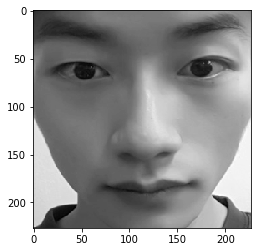

In [229]:
z = sample_x[0]
q = np.moveaxis(z, 2, 0)
u = q[0]

import matplotlib.pyplot as plt
plt.imshow(u)
#plt.show()


